    Exercise Week 3

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Task 1

## 1.a

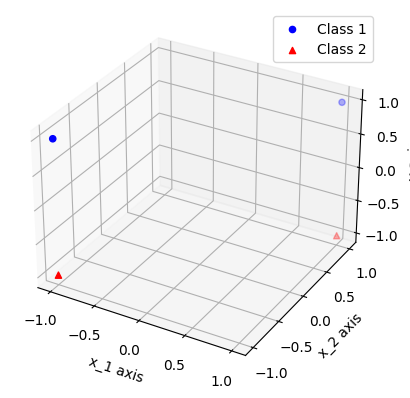

In [2]:
# Define the points and their labels
points = np.array([[1, 1, 1],   # class 1: x1
                   [-1, -1, 1],  # class 1: x2
                   [-1, 1, -1],  # class 2: x3
                   [1, -1, -1]]) # class 2: x4

# Extract coordinates and labels
x_1 = points[:, 0]
x_2 = points[:, 1]
y = points[:, 2]
labels = [1, 1, -1, -1]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points with different colors for each class
class1_indices = [i for i, label in enumerate(labels) if label == 1]
class2_indices = [i for i, label in enumerate(labels) if label == -1]

class1 = ax.scatter(x_1[class1_indices], x_2[class1_indices], y[class1_indices], c='blue', marker='o', label='Class 1')
class2 = ax.scatter(x_2[class2_indices], x_2[class2_indices], y[class2_indices], c='red', marker='^', label='Class 2')

# Set labels and legend
ax.set_xlabel('x_1 axis')
ax.set_ylabel('x_2 axis')
ax.set_zlabel('y axis')
ax.legend(handles=[class1, class2]);

## 1.b

In [3]:
# Define the 2D points as given
x_1 = np.array([1, 1])
x_2 = np.array([-1, -1])
x_3 = np.array([-1, 1])
x_4 = np.array([1, -1])

In [4]:
# Define the basis function phi(x)
def phi(x):
    #initialize 6D vector with zeros
    phi_x = np.zeros(6)
    #compute each of the components
    phi_x[0] = 1
    phi_x[1] = np.sqrt(2) * x[0]
    phi_x[2] = np.sqrt(2) * x[1]
    phi_x[3] = np.sqrt(2) * x[0] * x[1]
    phi_x[4] = x[0] ** 2
    phi_x[5] = x[1] ** 2
    return phi_x

In [5]:
#compute phi for each vector
phi_x1 = phi(x_1)
phi_x2 = phi(x_2)
phi_x3 = phi(x_3)
phi_x4 = phi(x_4)

In [6]:
phi_x1.shape

(6,)

## 1.c

## 1.d

# Task 3

## 3.a

In [7]:
#reading in data, skipping first 9 rows, dropping Density for now because cannot be converted to float
data = pd.read_csv('bodyfat.txt', delimiter='\s+', skiprows=9).drop(labels = 0, axis = 'index').convert_dtypes(convert_floating=True)#.drop(labels = ['Density', 'Age'], axis = 'columns')
data['Density'] = data['Density'].astype(float)
data['Age'] = data['Age'].astype(float)
#data.dtypes

### Step 1: compute sample mean

In [8]:
#compute sample mean column-wise
mean = data.mean(axis = 0)

### Step 2: Sample Covariance Matrix

In [9]:
#center data
centered_data = data - mean
#compute cov matrix using centered data 
cov_matrix = ((1/(len(centered_data) - 1))*(centered_data.T @ centered_data)).astype(float)

### Step 3: Compute Eigenvalues and Eigenvectors

In [10]:
#compute eigenvalues and eigenvectors
eig_vals, eig_vecs= np.linalg.eig(cov_matrix)

### Step 4: Re-order Eigenvalues in decresing order & Eigenvectors correspondingly

In [11]:
# Sort eigenvalues and corresponding eigenvectors in descending order
# Get the indices that would sort in descending order
sorted_indices = np.argsort(eig_vals)[::-1]  #[::-1] reserves the order as usually it's ascending
# Sort eigenvalues
eig_vals_sorted = eig_vals[sorted_indices]  
#sort eigenvecs accordingsly  
eig_vecs_sorted = eig_vecs[:, sorted_indices]  

### Step 5: Compute U with M=2

In [12]:
# M=2, so we extract th etwo biggest eigenvalues/vectors
u_1 = eig_vecs_sorted[:,0]
u_2 = eig_vecs_sorted[:,1]
#contruct M
U = np.vstack([u_1, u_2]).T

### Step 6: Dimensionality Reduction

In [42]:
z = centered_data @ U

In [43]:
z.shape

(252, 2)

### Step 7: Create New Datapoint

In [65]:
#pick random a_1 and a_2
alpha_1 = np.random.uniform(-3* np.sqrt(eig_vals_sorted[0]),3* np.sqrt(eig_vals_sorted[0]), size = 1)
alpha_2 = np.random.uniform(-3* np.sqrt(eig_vals_sorted[1]),3* np.sqrt(eig_vals_sorted[1]), size = 1)
#create new data point x
#new_mean = z.mean(axis = 0)
new_x = mean + (alpha_1 * u_1 + alpha_2 * u_2)

In [66]:
new_x.shape

(15,)

from slides:

$$ \hat x_n = \mathbf{u_1} z_n + \bar x $$

### Step 8: Plot resulting 2D datapoints

## 3b

In [27]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create a PCA instance with n_components = 2 because we reduce to 2 dimensions
n_components = 2
pca = PCA(n_components=n_components)

#Fit and transform the data
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame to store the reduced dimensions
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,-2.496505,-0.748283
1,-1.644131,-2.630821
2,-1.872851,0.868035
3,-0.645074,-1.921050
4,0.825369,0.068780


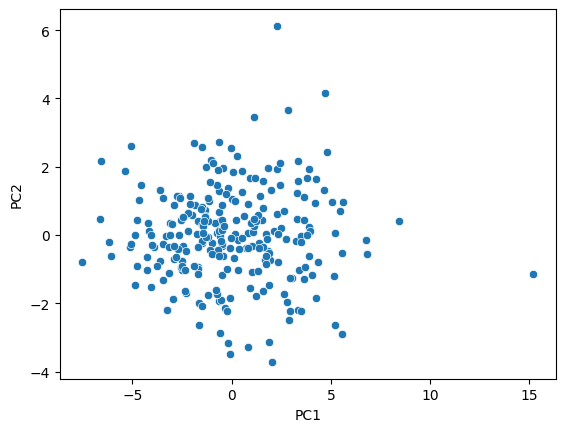

In [33]:
sns.scatterplot(x = 'PC1', y = 'PC2', data= pca_df);

## 3c